# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [3]:
city_name=[]
for city in cities:
    country_code = city.country_code
    name = city.city_name
    city_name.append(name)

In [4]:
city_name


['hearst',
 'samusu',
 'avera',
 'la grande',
 'busselton',
 'albany',
 'bluff',
 'sola',
 'rikitea',
 'maghama',
 'norman wells',
 'faanui',
 'punta arenas',
 'nikolskoye',
 'entre rios',
 'ketchikan',
 'mataura',
 'kapaa',
 'ushuaia',
 'hermanus',
 'nieuw nickerie',
 'tuatapere',
 'cabatuan',
 'bethel',
 'sao joao da barra',
 'lebork',
 'caucaia',
 'fairbanks',
 'vostok',
 'mangrol',
 'carnarvon',
 'butaritari',
 'port elizabeth',
 'ancud',
 'hobart',
 'east london',
 'carnarvon',
 'san patricio',
 'pangai',
 'dingle',
 'sampit',
 'mar del plata',
 'praia da vitoria',
 'arraial do cabo',
 'torbay',
 'sitka',
 'shingu',
 'atuona',
 'porangatu',
 'wad madani',
 'flinders',
 'port alfred',
 'codrington',
 'eirunepe',
 'northam',
 'vila franca do campo',
 'mount isa',
 'acapulco',
 'lodja',
 'pueblo nuevo',
 'bilibino',
 'bredasdorp',
 'muros',
 'puerto ayora',
 'barrow',
 'konstantinovka',
 'lavrentiya',
 'saurimo',
 'faya',
 'riyadh',
 'ilulissat',
 'rapar',
 'castro',
 'pedernales',
 

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [6]:
response = requests.get(query_url + "Tokyo").json()
response

{'coord': {'lon': 139.76, 'lat': 35.68},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 11.04,
  'pressure': 1018,
  'humidity': 54,
  'temp_min': 7.78,
  'temp_max': 13.33},
 'visibility': 10000,
 'wind': {'speed': 4.1, 'deg': 330},
 'clouds': {'all': 0},
 'dt': 1553034898,
 'sys': {'type': 1,
  'id': 8074,
  'message': 0.0046,
  'country': 'JP',
  'sunrise': 1553028348,
  'sunset': 1553071892},
 'id': 1850147,
 'name': 'Tokyo',
 'cod': 200}

In [7]:
test=['beijing','shanghai']

In [8]:
data={'city':city_name,'latitude':"",'temperature':"",'humidity':"",'cloudiness':"",'windspeed':""}
df=pd.DataFrame(data)

In [9]:
df

,city,latitude,temperature,humidity,cloudiness,windspeed
0,hearst,,,,,
1,samusu,,,,,
2,avera,,,,,
3,la grande,,,,,
4,busselton,,,,,
5,albany,,,,,
6,bluff,,,,,
7,sola,,,,,
8,rikitea,,,,,
9,maghama,,,,,


In [10]:
# Loop through the list of cities and perform a request for data on each
nan = float('nan')
test=['beijing','shanghai']
for index, row in df.iterrows():
    city=row['city']
    response = requests.get(query_url + city).json()
    try:
        df.loc[index,'latitude']=response['coord']['lat']
        df.loc[index,'temperature']=response['main']['temp']
        df.loc[index,'humidity']=response['main']['humidity']
        df.loc[index,'cloudiness']=response['clouds']['all']
        df.loc[index,'windspeed']=response['wind']['speed']
        #lat.append(response['coord']['lat'])
        #temp.append(response['main']['temp'])
        #humi.append(response['main']['humidity'])
        #cloud.append(response['clouds']['all'])
        #wind.append(response['wind']['speed'])
    except (KeyError,IndexError):
         print("Missing field/result... skipping.")
        
    print("------------")
        #lat.append(nan)
        #temp.append(nan)
        #humi.append(nan)
        #cloud.append(nan)
        #wind.append(nan)
        

------------
Missing field/result... skipping.
------------
------------
------------
------------
------------
------------
------------
------------
Missing field/result... skipping.
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
Missing field/result... skipping.
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
-

------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
Missing field/result... skipping.
------------
------------
------------
------------
------------
------------
------------
------------
------------
Missing field/result... skipping.
------------
Missing field/result... skipping.
------------
------------
------------
------------
------------
------------
Missing field/result... skipping.
------------
------------
------------
------------
------------
------------
------------
------------
Missing field/result... skipping.
------------
------------
------------
------------
------------
------------
------------
------------
------------
------------
Missing field/result... skipping.
------------
------------
Missing field/result... skipping.
------------
------------
Missing field/result... skipping.
------------


In [11]:
df

,city,latitude,temperature,humidity,cloudiness,windspeed
0,hearst,49.69,2.14,69,88,3.81
1,samusu,,,,,
2,avera,33.19,15.14,26,1,4.1
3,la grande,45.32,12.16,24,1,1.5
4,busselton,-33.64,17.56,58,12,7.06
5,albany,42.65,2.03,32,20,5.7
6,bluff,-23.58,28.14,78,0,2.01
7,sola,62.78,0.94,93,90,1.5
8,rikitea,-23.12,25.39,100,0,9.86
9,maghama,,,,,


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
df.to_csv('city_weather.csv')

In [13]:
data=pd.read_csv('city_weather.csv')
data.head()

,Unnamed: 0,city,latitude,temperature,humidity,cloudiness,windspeed
0,0,hearst,49.69,2.14,69.0,88.0,3.81
1,1,samusu,NaN,NaN,NaN,NaN,NaN
2,2,avera,33.19,15.14,26.0,1.0,4.10
3,3,la grande,45.32,12.16,24.0,1.0,1.50
4,4,busselton,-33.64,17.56,58.0,12.0,7.06


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 7 columns):
Unnamed: 0     622 non-null int64
city           622 non-null object
latitude       558 non-null float64
temperature    558 non-null float64
humidity       558 non-null float64
cloudiness     558 non-null float64
windspeed      558 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 34.1+ KB


In [15]:
data_copy=data.dropna()
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558 entries, 0 to 621
Data columns (total 7 columns):
Unnamed: 0     558 non-null int64
city           558 non-null object
latitude       558 non-null float64
temperature    558 non-null float64
humidity       558 non-null float64
cloudiness     558 non-null float64
windspeed      558 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 34.9+ KB


In [16]:
# change the temperature from C to F.

In [17]:
b=(data_copy.loc[:,'temperature'])*9/5+32

In [18]:
b

0      35.852
2      59.252
3      53.888
4      63.608
5      35.654
6      82.652
7      33.692
8      77.702
10     57.200
11     82.742
12     51.368
13     34.970
14     82.382
15     57.200
16     60.998
17     76.442
18     50.000
19     64.994
20     78.872
21     60.998
22     73.562
23     16.664
24     82.400
25     32.342
26     78.278
27     28.544
28     43.952
29     64.472
30     58.532
31     76.982
        ...  
588    57.200
589    41.432
590    78.422
591    57.110
592    63.122
593    49.748
594    73.400
595    47.750
596    45.248
597    52.862
598    21.416
599    55.904
600    71.762
601     9.932
602    31.172
604    10.400
605    82.130
607    14.162
608    71.132
609    48.200
611    44.078
612    49.100
613    40.532
614    35.042
615    74.912
616    82.994
618    47.822
619    54.284
620    79.268
621    40.568
Name: temperature, Length: 558, dtype: float64

In [19]:
data_copy['Temperature_F']=b

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
data_copy.head()

,Unnamed: 0,city,latitude,temperature,humidity,cloudiness,windspeed,Temperature_F
0,0,hearst,49.69,2.14,69.0,88.0,3.81,35.852
2,2,avera,33.19,15.14,26.0,1.0,4.10,59.252
3,3,la grande,45.32,12.16,24.0,1.0,1.50,53.888
4,4,busselton,-33.64,17.56,58.0,12.0,7.06,63.608
5,5,albany,42.65,2.03,32.0,20.0,5.70,35.654


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [24]:
lat_tem=data_copy[['latitude','temperature']]


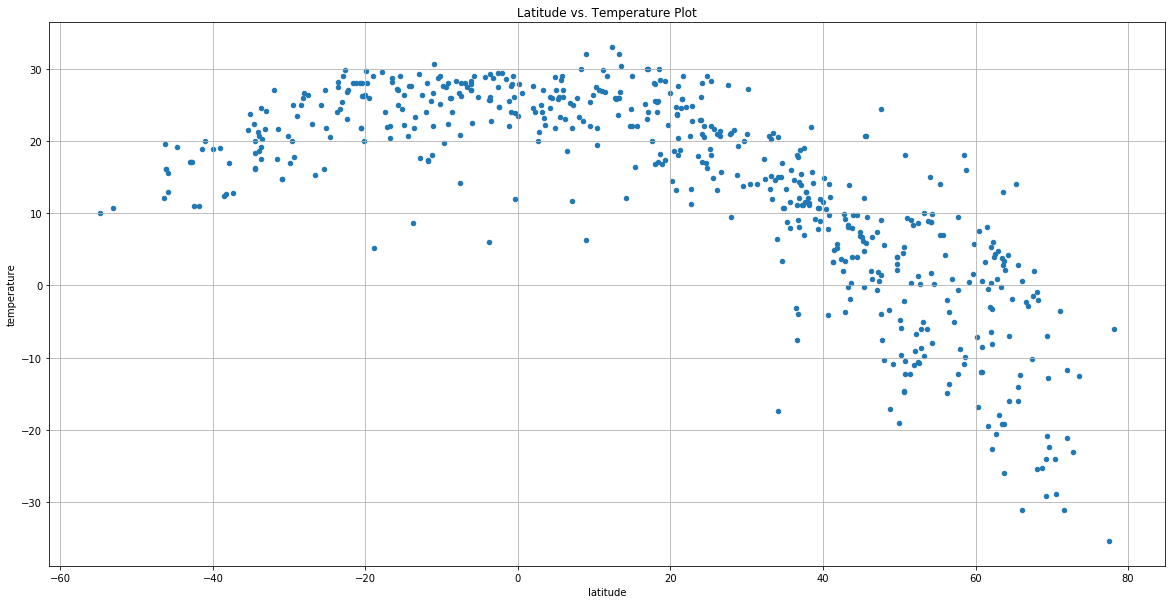

In [41]:
lat_tem.plot(kind='scatter',x='latitude',y='temperature',grid=True, figsize=(20,10))
plt.title('Latitude vs. Temperature Plot')
plt.savefig('lat_tem.png')


#### Latitude vs. Humidity Plot

In [27]:
lat_hum=data_copy[['latitude','humidity']]

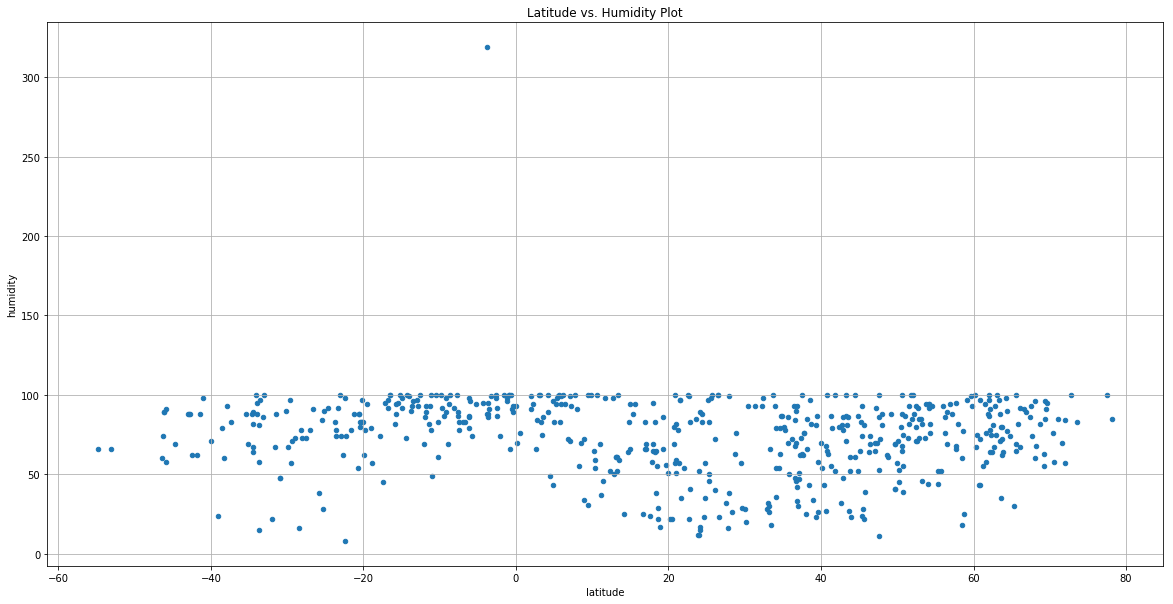

In [42]:
lat_hum.plot(kind='scatter',x='latitude',y='humidity',grid=True, figsize=(20,10))
plt.title('Latitude vs. Humidity Plot')
plt.savefig('lat_hum.png')


#### Latitude vs. Cloudiness Plot

In [30]:
lat_clo=data_copy[['latitude','cloudiness']]

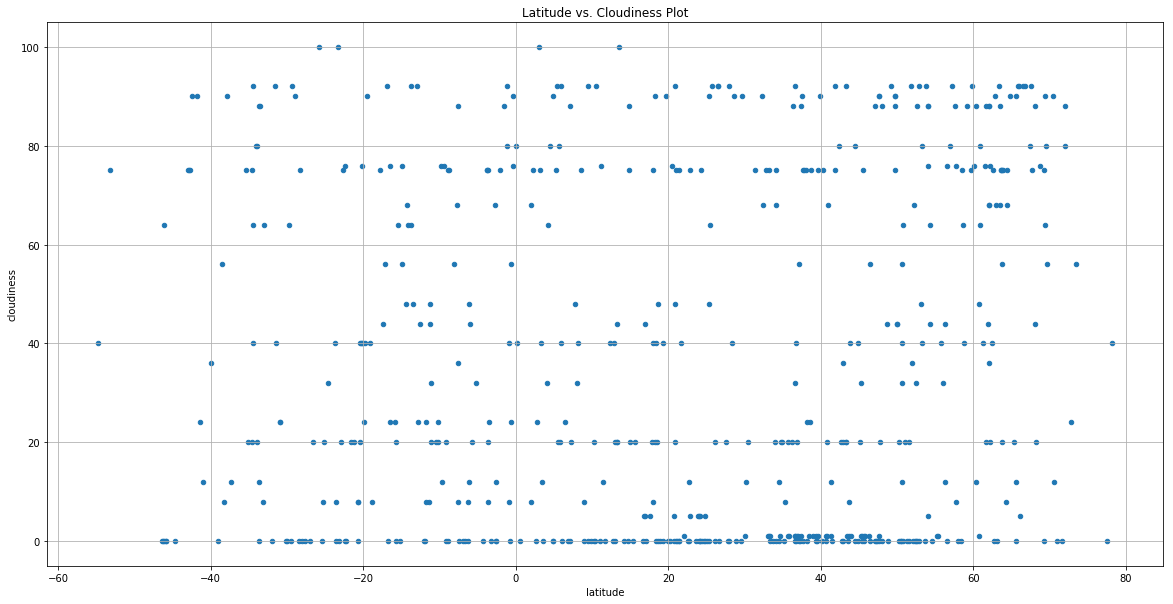

In [43]:
lat_clo.plot(kind='scatter',x='latitude',y='cloudiness',grid=True, figsize=(20,10))
plt.title('Latitude vs. Cloudiness Plot')
plt.savefig('lat_clo.png')


#### Latitude vs. Wind Speed Plot

In [33]:
lat_win=data_copy[['latitude','windspeed']]

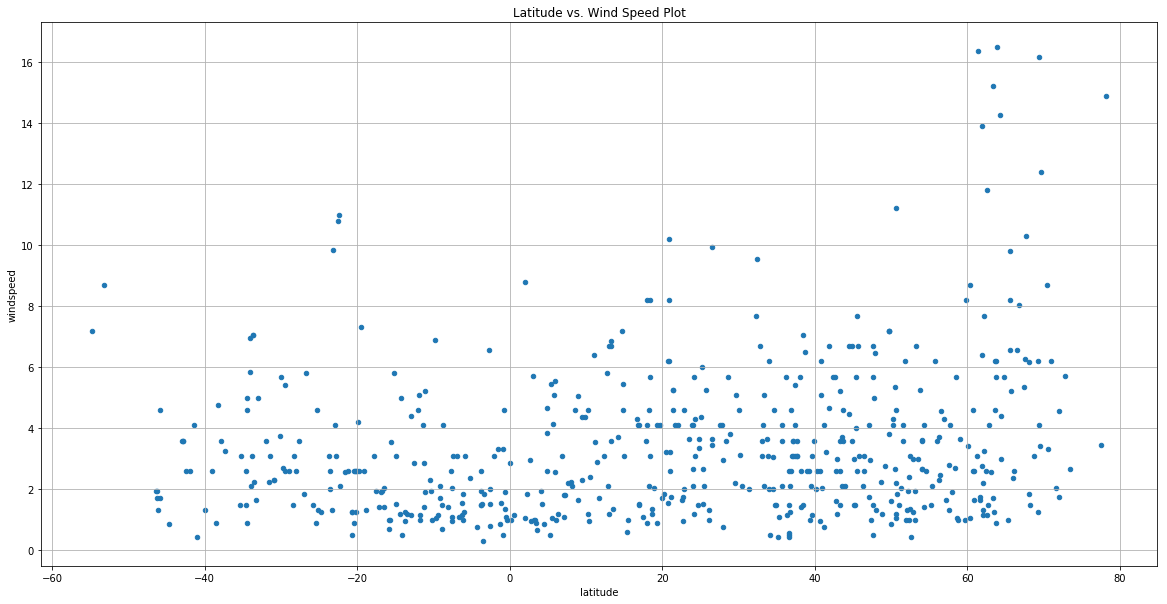

In [44]:
lat_win.plot(kind='scatter',x='latitude',y='windspeed',grid=True, figsize=(20,10))
plt.title('Latitude vs. Wind Speed Plot')
plt.savefig('lat_wind.png')
